In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Sample retail dataset (this could be loaded from a CSV or database)
np.random.seed(42)  

# Simulating a retail dataset with 500 customers
data = {
    'customer_id': np.arange(1, 501),
    'purchase_amount': np.random.normal(loc=100, scale=20, size=500)  # Normally distributed purchases
}

df = pd.DataFrame(data)

# or you can use this for existing dataframe 
# df = pd.read_csv("abc.csv")

# Show the first few rows of the dataset
print(df.head())

   customer_id  purchase_amount
0            1       109.934283
1            2        97.234714
2            3       112.953771
3            4       130.460597
4            5        95.316933


In [2]:
# 1. Calculate Mean, Median, and Mode for purchase_amount
mean_purchase = df['purchase_amount'].mean()
median_purchase = df['purchase_amount'].median()
mode_purchase = df['purchase_amount'].mode()[0]  # Mode returns a Series, take the first value

print("\nMean Purchase Amount:", mean_purchase)
print("Median Purchase Amount:", median_purchase)
print("Mode Purchase Amount:", mode_purchase)


Mean Purchase Amount: 100.13675989177295
Median Purchase Amount: 100.25594292659702
Mode Purchase Amount: 35.17465319861854


In [3]:
# 2. Identify High-Spending Customers Using Z-score
# Z-score is used to detect how far a data point is from the mean in terms of standard deviations
z_scores = stats.zscore(df['purchase_amount'])
df['z_score'] = z_scores

# Define a threshold to identify high-spending customers (e.g., z-score > 3)
high_spending_customers_z = df[df['z_score'] > 3]

print("\nHigh Spending Customers (using Z-score):")
print(high_spending_customers_z)


High Spending Customers (using Z-score):
     customer_id  purchase_amount   z_score
209          210       177.054630  3.923294
478          479       161.577616  3.133869


In [4]:
# 3. Outlier Detection using the IQR (Interquartile Range) Method
Q1 = df['purchase_amount'].quantile(0.25)
Q3 = df['purchase_amount'].quantile(0.75)
IQR = Q3 - Q1

# Define the thresholds for outliers (1.5 * IQR rule)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers (high spenders in this case)
outliers = df[(df['purchase_amount'] < lower_bound) | (df['purchase_amount'] > upper_bound)]

print("\nOutlier Detection (using IQR):")
print(outliers)


Outlier Detection (using IQR):
     customer_id  purchase_amount   z_score
179          180       154.403383  2.767938
209          210       177.054630  3.923294
262          263        35.174653 -3.313475
478          479       161.577616  3.133869


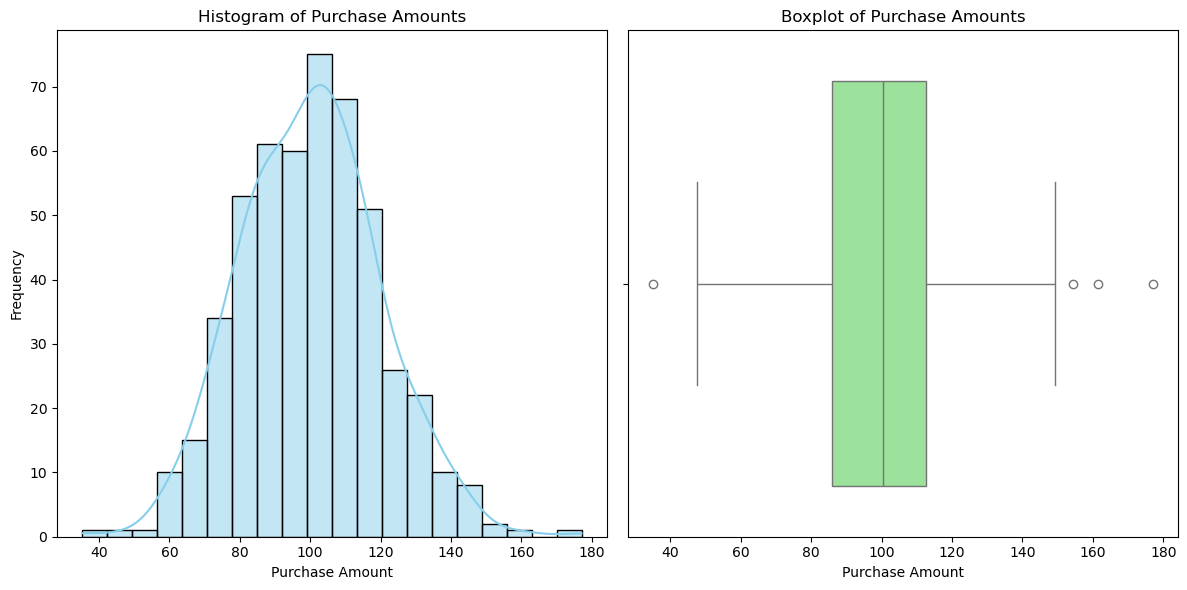

In [5]:
# 4. Visualize the Data: Histogram and Boxplot
plt.figure(figsize=(12, 6))

# Histogram of purchase amounts
plt.subplot(1, 2, 1)
sns.histplot(df['purchase_amount'], kde=True, bins=20, color='skyblue')
plt.title("Histogram of Purchase Amounts")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")

# Boxplot to visualize outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='purchase_amount', color='lightgreen')
plt.title("Boxplot of Purchase Amounts")
plt.xlabel("Purchase Amount")

plt.tight_layout()
plt.show()